In [1]:
# Import required libraries
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import Video, display
import time

# Import the video convolution module
from video_convolution import VideoConvolution

## 1. Configuration

Specify your input video path, output path, and kernel choice here.

In [2]:
# ========== CONFIGURATION ==========

# Input and output paths
INPUT_VIDEO = r"C:\Users\wanglab\Desktop\mel\shortened_mel.mp4"  # Change this to your video path
OUTPUT_VIDEO = r"C:\Users\wanglab\Desktop\mel\shortened_mel_sobel_y.mp4"  # Change this to desired output path

# Kernel selection - choose from predefined or use custom
USE_PREDEFINED = False  # Set to False to use custom kernel
KERNEL_NAME = "sobel_x"  # Options: identity, sharpen, box_blur, gaussian_blur, 
                         # edge_detect, sobel_x, sobel_y, laplacian, emboss, outline

# Custom kernel (used if USE_PREDEFINED = False)
CUSTOM_KERNEL = np.array([[-5, -10, -5],
                          [0,  0, 0],
                          [5, 10, 5]])

# Normalize output (recommended for edge detection kernels)
NORMALIZE = False

# ===================================

print(f"Input video: {INPUT_VIDEO}")
print(f"Output video: {OUTPUT_VIDEO}")
print(f"Using {'predefined' if USE_PREDEFINED else 'custom'} kernel")

Input video: C:\Users\wanglab\Desktop\mel\shortened_mel.mp4
Output video: C:\Users\wanglab\Desktop\mel\shortened_mel_sobel_y.mp4
Using custom kernel


## 2. List Available Kernels

View all predefined kernels and their matrix values.

In [3]:
# Display all available predefined kernels
VideoConvolution.list_available_kernels()

Available kernels:

identity:
[[0 0 0]
 [0 1 0]
 [0 0 0]]

sharpen:
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]

box_blur:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

gaussian_blur:
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]

edge_detect:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]

sobel_x:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]

sobel_y:
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]

laplacian:
[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]

emboss:
[[-2 -1  0]
 [-1  1  1]
 [ 0  1  2]]

outline:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


## 3. Preview Single Frame

Test the kernel on a single frame before processing the entire video.

Using custom kernel

Kernel matrix:
[[ -5 -10  -5]
 [  0   0   0]
 [  5  10   5]]


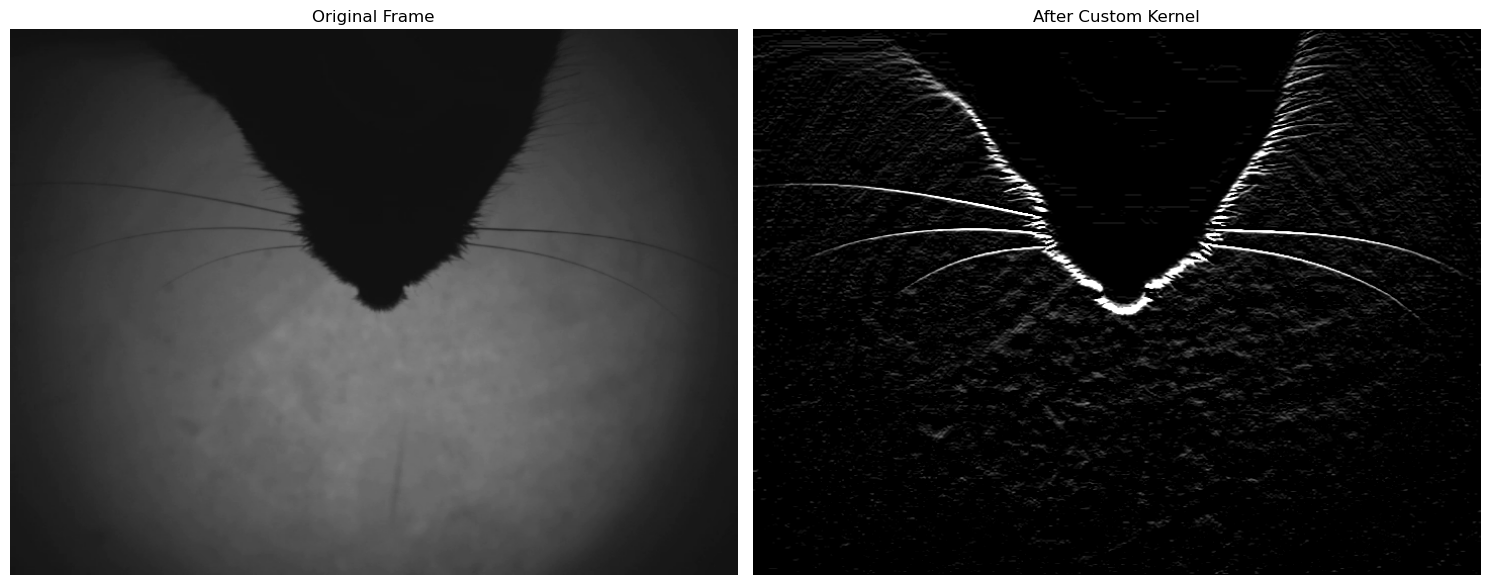

In [4]:
# Load a single frame for preview
cap = cv2.VideoCapture(INPUT_VIDEO)
ret, frame = cap.read()
cap.release()

if ret:
    # Select kernel
    if USE_PREDEFINED:
        kernel = VideoConvolution.KERNELS[KERNEL_NAME]
        print(f"Using predefined kernel: {KERNEL_NAME}")
    else:
        kernel = CUSTOM_KERNEL
        print("Using custom kernel")
    
    print("\nKernel matrix:")
    print(kernel)
    
    # Apply convolution to preview frame
    preview_frame = np.zeros_like(frame, dtype=np.float32)
    for i in range(3):
        preview_frame[:, :, i] = cv2.filter2D(frame[:, :, i].astype(np.float32), -1, kernel)
    
    if NORMALIZE:
        preview_frame = cv2.normalize(preview_frame, None, 0, 255, cv2.NORM_MINMAX)
    else:
        preview_frame = np.clip(preview_frame, 0, 255)
    
    preview_frame = preview_frame.astype(np.uint8)
    
    # Display comparison
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    axes[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Frame')
    axes[0].axis('off')
    
    axes[1].imshow(cv2.cvtColor(preview_frame, cv2.COLOR_BGR2RGB))
    axes[1].set_title(f'After {KERNEL_NAME if USE_PREDEFINED else "Custom"} Kernel')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("Error: Could not read frame from video")

## 4. Process Entire Video

Apply the convolution kernel to all frames in the video.

In [5]:
# Create VideoConvolution object
vc = VideoConvolution(INPUT_VIDEO, OUTPUT_VIDEO)

# Progress callback function
def progress_callback(current, total):
    percent = (current / total) * 100
    print(f"\rProgress: {current}/{total} frames ({percent:.1f}%)", end="")

# Apply convolution
print("Starting video processing...\n")
start_time = time.time()

if USE_PREDEFINED:
    success = vc.apply_predefined_kernel(KERNEL_NAME, NORMALIZE)
else:
    success = vc.apply_convolution(CUSTOM_KERNEL, NORMALIZE, progress_callback)

elapsed_time = time.time() - start_time

if success:
    print(f"\n\n✓ Video processing completed successfully in {elapsed_time:.2f} seconds!")
    print(f"Output saved to: {OUTPUT_VIDEO}")
else:
    print("\n\n✗ Video processing failed!")

Starting video processing...

Video properties: 720x540, 30 FPS, 117750 frames
Progress: 117750/117750 frames (100.0%)
Completed! Processed 117750 frames in 1585.40 seconds
Output saved to: C:\Users\wanglab\Desktop\mel\shortened_mel_sobel_y.mp4


✓ Video processing completed successfully in 1585.41 seconds!
Output saved to: C:\Users\wanglab\Desktop\mel\shortened_mel_sobel_y.mp4


## 5. Display Output Video

Preview the processed video (if the file size is reasonable).

In [ ]:
# Display the output video
if Path(OUTPUT_VIDEO).exists():
    print(f"Output video size: {Path(OUTPUT_VIDEO).stat().st_size / (1024*1024):.2f} MB")
    
    # Only display if file is less than 50MB (to avoid notebook lag)
    if Path(OUTPUT_VIDEO).stat().st_size < 50 * 1024 * 1024:
        display(Video(OUTPUT_VIDEO, width=800))
    else:
        print("Output video is too large to display in notebook. Please open it with a video player.")
else:
    print("Output video not found!")

## 6. Batch Processing (Optional)

Process the same video with multiple different kernels.

In [ ]:
# Define kernels to apply
BATCH_KERNELS = ["sharpen", "box_blur", "edge_detect", "emboss"]

# Base output path
base_output = Path(OUTPUT_VIDEO)
output_dir = base_output.parent
base_name = base_output.stem
extension = base_output.suffix

# Process each kernel
for kernel_name in BATCH_KERNELS:
    output_path = output_dir / f"{base_name}_{kernel_name}{extension}"
    
    print(f"\n{'='*60}")
    print(f"Processing with '{kernel_name}' kernel...")
    print(f"{'='*60}")
    
    vc = VideoConvolution(INPUT_VIDEO, str(output_path))
    success = vc.apply_predefined_kernel(kernel_name, normalize=False)
    
    if success:
        print(f"✓ Completed: {output_path}")
    else:
        print(f"✗ Failed: {kernel_name}")

print(f"\n{'='*60}")
print("Batch processing complete!")
print(f"{'='*60}")